In [1]:
import hdbscan
import pandas as pd
import numpy as np
%matplotlib ipympl
import matplotlib.pyplot as plt
from sklearn import manifold
from ipywidgets import interact, Output
from IPython.display import clear_output

import sys
sys.path.append('..')
from src.band_plotters import DATA_DIRECTORY
from src.cluster_plotters import plot_cluster_ellipses, plot_groups

In [2]:
FINGERPRINT_NAME = "all_k_branches_histogram_-8_to_8_normed"
FINGERPRINT_LENGTH = 120
PERPLEXITY = 30
INPUT_NAME = f"{FINGERPRINT_NAME}_perplexity_{PERPLEXITY}_length_{FINGERPRINT_LENGTH}.csv"

## Load Data

In [3]:
df = pd.read_csv(f"../fingerprints/{INPUT_NAME}", index_col="ID")
df.head()

,formula,gen_formula,space_group,segments,flat_segments,flatness_score,discovery,binary_flatness,horz_flat_seg,exfoliation_eg,...,112,113,114,115,116,117,118,119,fx,fy
ID,,,,,,,,,,,,,,,,,,,,,
2dm-1,IrF2,AB2,164,3,0,0.095102,bottom-up,0,0,0.234620,...,0.039809,0.079618,0.119427,0.071656,0.071656,0.151274,0.111465,0.071656,-29.415546,12.497206
2dm-2,Ba2Sb,AB2,164,3,1,0.387410,bottom-up,0,0,0.210650,...,0.056936,0.067288,0.139752,0.041408,0.025880,0.000000,0.000000,0.000000,-115.863630,-41.305870
2dm-3,TlS,AB,2,4,4,0.846460,bottom-up,1,3,0.095794,...,0.090058,0.048631,0.072046,0.084654,0.117075,0.142291,0.189121,0.115274,38.001920,-1.966975
2dm-4,MoCl2,AB2,166,5,4,0.713760,bottom-up,0,0,-0.055818,...,0.016997,0.072238,0.044618,0.089235,0.070113,0.084986,0.093484,0.106232,-19.082489,-67.730130
2dm-6,RuI2,AB2,164,3,1,0.264930,bottom-up,0,0,0.084831,...,0.092379,0.115473,0.103926,0.086605,0.115473,0.115473,0.121247,0.150115,-53.151638,-13.686889


## Cluster

In [4]:
fingerprint_cols = [str(i) for i in range(FINGERPRINT_LENGTH)]

In [5]:
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,\
                        gen_min_span_tree=False, leaf_size=40, metric='minkowski', cluster_selection_method='leaf', min_cluster_size=4, min_samples=4, p=0.2)
clusterer.fit(df[fingerprint_cols])

df["labels"] = clusterer.labels_

interactive(children=(IntSlider(value=17, description='label', max=35, min=-1), Output()), _dom_classes=('widg…

<function __main__.view_cluster(label)>

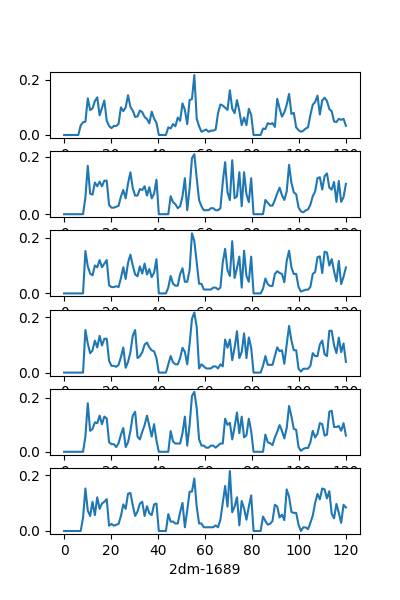

In [6]:
def view_cluster(label):
    display(df[df.labels==label].head(100))

    num_plots = len(df[df.labels==label])

    fig, ax = plt.subplots(num_plots, 1, figsize=(4, 1*num_plots))

    for i, index in enumerate(df[df.labels==label].index):
        ax[i].plot(np.linspace(0, FINGERPRINT_LENGTH, FINGERPRINT_LENGTH), df.loc[index][fingerprint_cols])
        ax[i].set_xlabel(index)
    
    
interact(view_cluster, label=(-1, len(np.unique(df.labels))-2, 1))

## Example Plots
I recommend plotting the groups before the cluster ellipses, otherwise the figure might end up having axis going from 0 to 1.

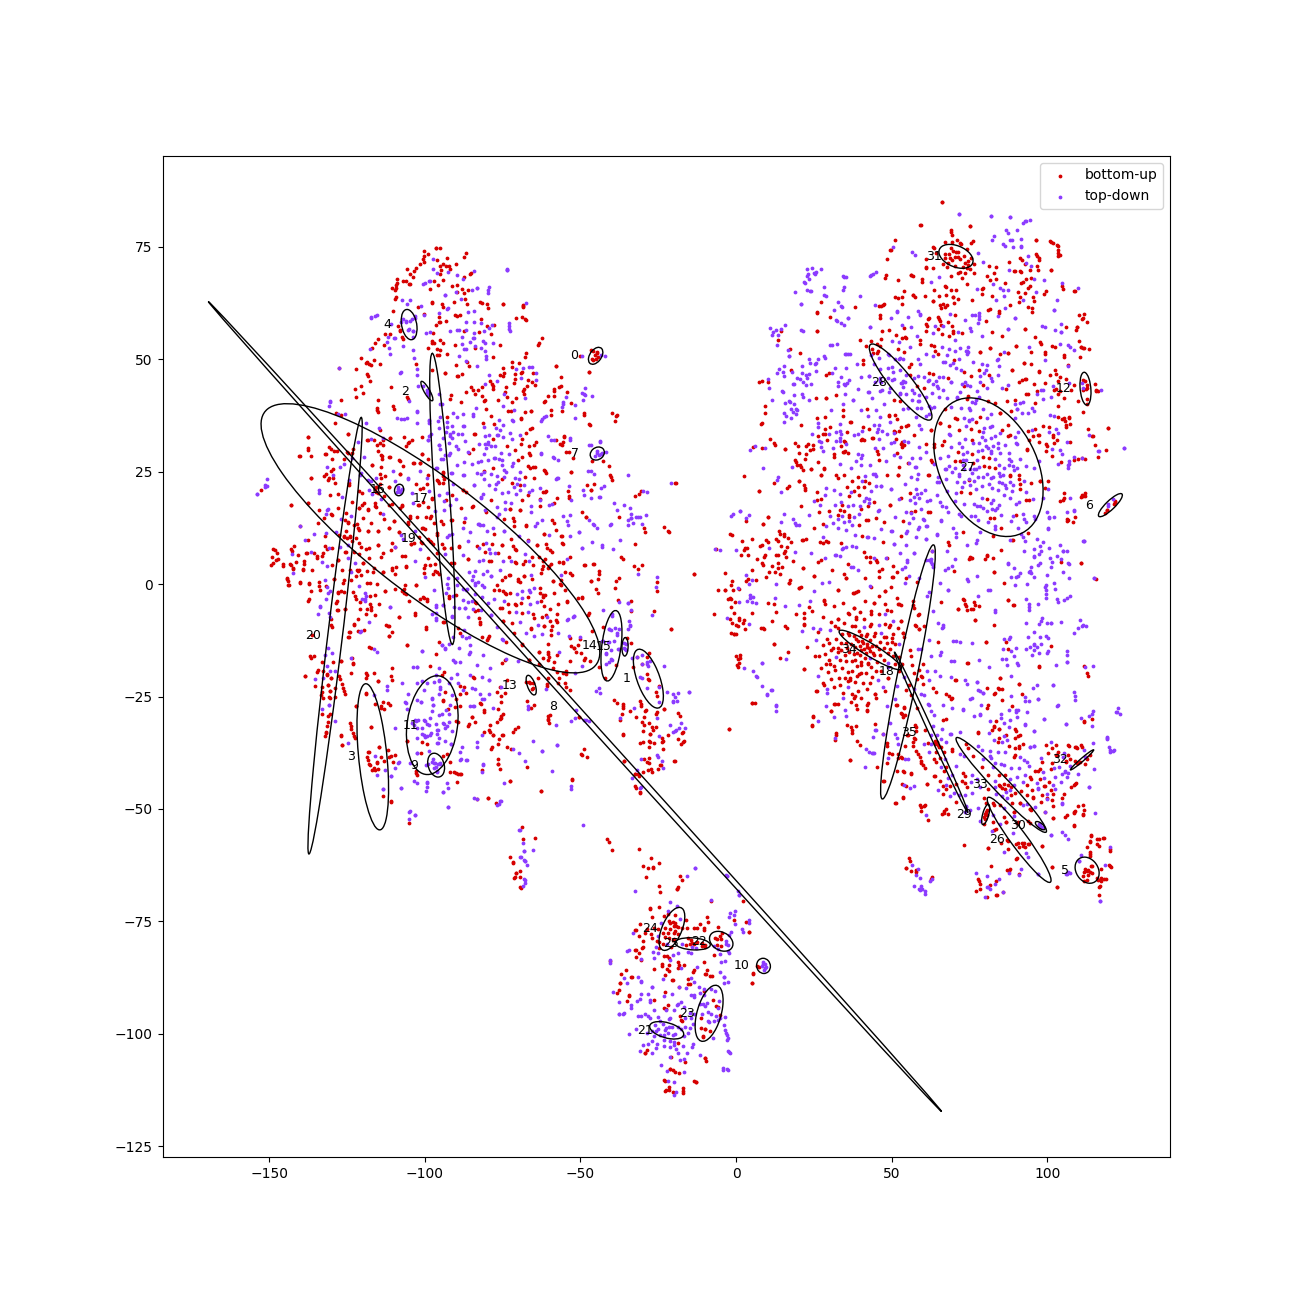

In [8]:
ax = plot_groups(df,"discovery")
ax = plot_cluster_ellipses(df, ax=ax, color="black")
ax.legend()

Colors used multiple times since number of categories exceeds 256.


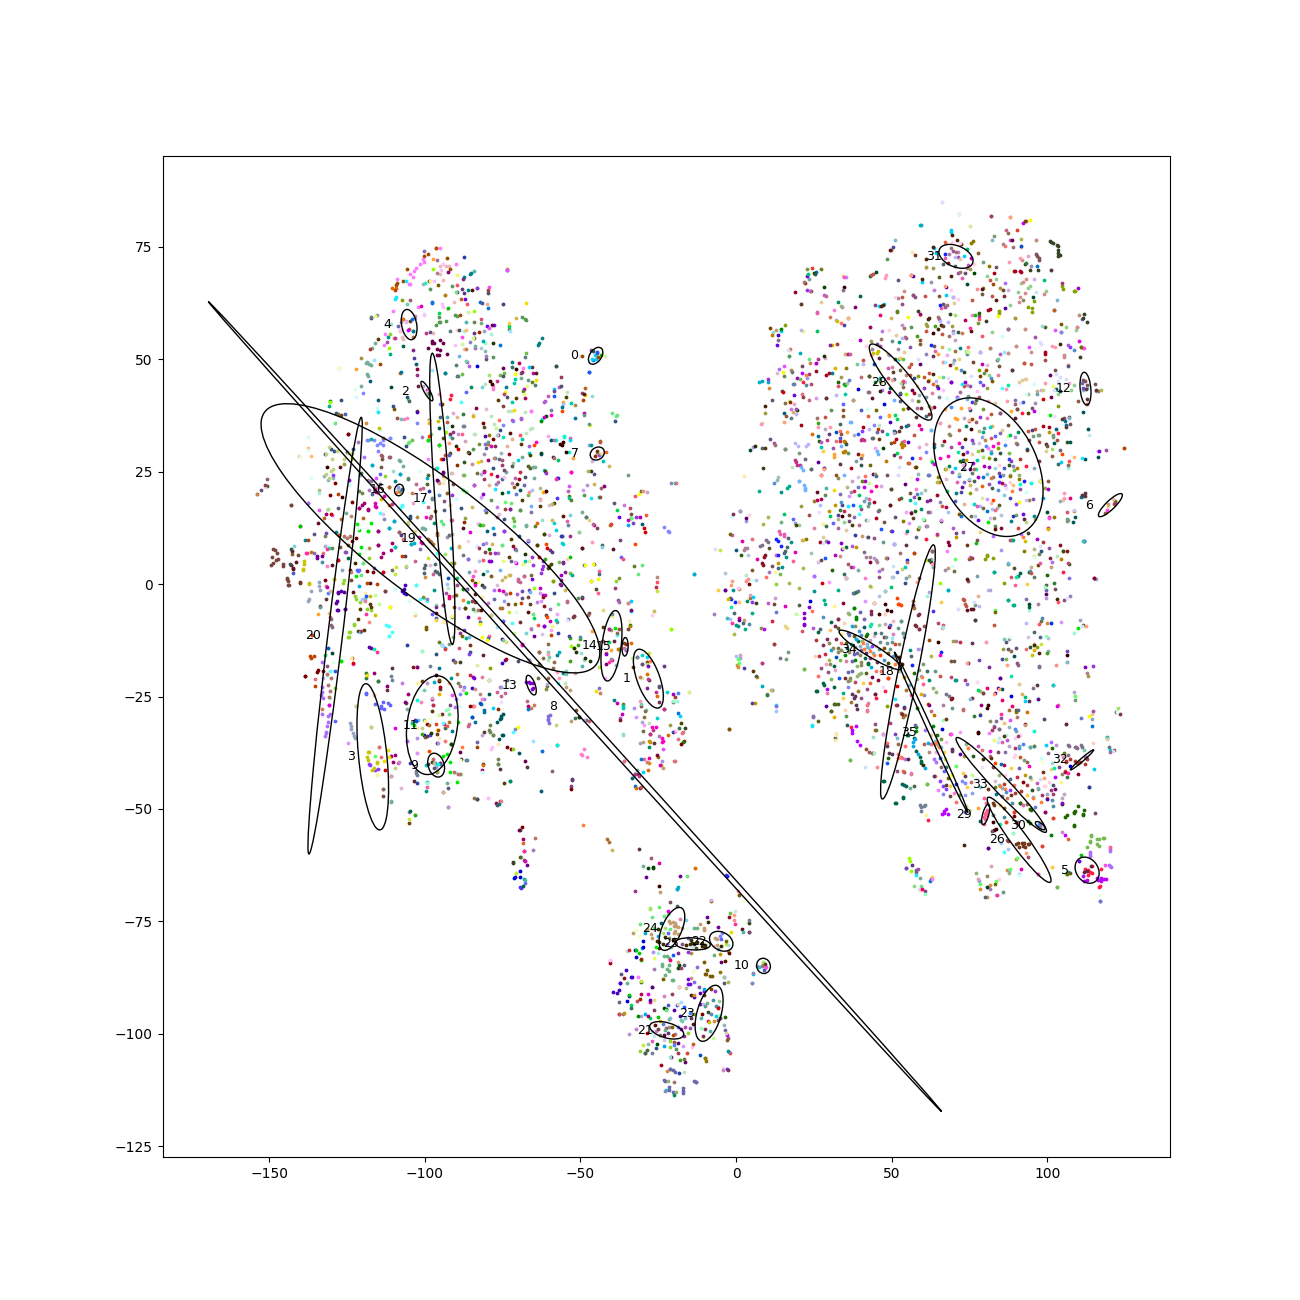

In [9]:
ax = plot_groups(df, "relative_id")
ax = plot_cluster_ellipses(df, ax=ax, color="black")
plt.show()